In [1]:
import datetime

# Misc. Python Libraries & Functionality

Libraries included in this are:

    1. CSV
    2. Requests
    3. BeautifulSoup
    4. OS
    

## 'curl' Terminal Command


To download files from the internet, you can use the 'curl' command. This is a terminal command, so you need to put an '!' in front of it if you are going to run it in a Notebook.

In [7]:
!curl -s https://people.sc.fsu.edu/~jburkardt/data/csv/addresses.csv > data/addresses.csv
!cat data/addresses.csv

print('\n')

!curl -s https://people.sc.fsu.edu/~jburkardt/data/csv/biostats.csv > data/biostats.csv
!head -n 3 data/biostats.csv

John,Doe,120 jefferson st.,Riverside, NJ, 08075
Jack,McGinnis,220 hobo Av.,Phila, PA,09119
"John ""Da Man""",Repici,120 Jefferson St.,Riverside, NJ,08075
Stephen,Tyler,"7452 Terrace ""At the Plaza"" road",SomeTown,SD, 91234
,Blankman,,SomeTown, SD, 00298
"Joan ""the bone"", Anne",Jet,"9th, at Terrace plc",Desert City,CO,00123


"Name",     "Sex", "Age", "Height (in)", "Weight (lbs)"
"Alex",       "M",   41,       74,      170
"Bert",       "M",   42,       68,      166


## CSV

CSV is a module for reading and writing CSV files.

### CSV Reading without Headers (csv.reader)

In [18]:
import csv

with open('data/addresses.csv') as csvfile:
    reader = csv.reader(csvfile, skipinitialspace=True)
    
    print(type(reader))
    
    for row in reader:
        # row is a `list`
        print(row)

<class '_csv.reader'>
['John', 'Doe', '120 jefferson st.', 'Riverside', 'NJ', '08075']
['Jack', 'McGinnis', '220 hobo Av.', 'Phila', 'PA', '09119']
['John "Da Man"', 'Repici', '120 Jefferson St.', 'Riverside', 'NJ', '08075']
['Stephen', 'Tyler', '7452 Terrace "At the Plaza" road', 'SomeTown', 'SD', '91234']
['', 'Blankman', '', 'SomeTown', 'SD', '00298']
['Joan "the bone", Anne', 'Jet', '9th, at Terrace plc', 'Desert City', 'CO', '00123']


### CSV with Headers (csv.DictReader)

In [1]:
import csv

with open('data/biostats.csv') as csvfile:
    reader = csv.DictReader(csvfile, skipinitialspace=True)
    
    # reader is a csv.DictReader object, and the information inside cannot be directly retreived.
    print(type(reader))
    
    # You need to use a for loop to access the data

    for row in reader:
        # Each row is a dictionary, with the header row as the keys
        print(type(row))
        print(row)
        
        # You can also access the values as below
        print(row['Name'], row['Sex'], int(row['Age']))
        
        #You can also read each row as it's own dictionary as below

<class 'csv.DictReader'>
<class 'dict'>
{'Name': 'Alex', 'Sex': 'M', 'Age': '41', 'Height (in)': '74', 'Weight (lbs)': '170'}
Alex M 41
<class 'dict'>
{'Name': 'Bert', 'Sex': 'M', 'Age': '42', 'Height (in)': '68', 'Weight (lbs)': '166'}
Bert M 42
<class 'dict'>
{'Name': 'Carl', 'Sex': 'M', 'Age': '32', 'Height (in)': '70', 'Weight (lbs)': '155'}
Carl M 32
<class 'dict'>
{'Name': 'Dave', 'Sex': 'M', 'Age': '39', 'Height (in)': '72', 'Weight (lbs)': '167'}
Dave M 39
<class 'dict'>
{'Name': 'Elly', 'Sex': 'F', 'Age': '30', 'Height (in)': '66', 'Weight (lbs)': '124'}
Elly F 30
<class 'dict'>
{'Name': 'Fran', 'Sex': 'F', 'Age': '33', 'Height (in)': '66', 'Weight (lbs)': '115'}
Fran F 33
<class 'dict'>
{'Name': 'Gwen', 'Sex': 'F', 'Age': '26', 'Height (in)': '64', 'Weight (lbs)': '121'}
Gwen F 26
<class 'dict'>
{'Name': 'Hank', 'Sex': 'M', 'Age': '30', 'Height (in)': '71', 'Weight (lbs)': '158'}
Hank M 30
<class 'dict'>
{'Name': 'Ivan', 'Sex': 'M', 'Age': '53', 'Height (in)': '72', 'Weight (

### Writing a CSV (csv.DictWriter)

In [27]:
beatles = [
    { 'first_name': 'John', 'last_name': 'lennon', 'instrument': 'guitar'},
    { 'first_name': 'Ringo', 'last_name': 'Starr', 'instrument': 'drums'}
]

The 'w' parameter in the 'open()' function is for write.

In [30]:
import csv

with open('data/beatles.csv', 'w') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=beatles[0].keys())
    writer.writeheader()
    for beatle in beatles:
          writer.writerow(beatle)
            

In [31]:
!cat data/beatles.csv

first_name,last_name,instrument
John,lennon,guitar
Ringo,Starr,drums


## FastApi & Uvicorn

👉 High performance python framework

👉 Easy to learn, fast to code

👉 Automatically generated documentation allowing to test the API endpoints easily 🎉

    pip install fastapi

https://fastapi.tiangolo.com/

FastAPI uses python decorators in order to link the routes that the developers will query to the code of the endpoints. The code of the decorated function will be called whenever a HTTP request is received. The response will be returned as a JSON object to the code querying the API.

The code below is written in a 'simple.py' python file

In [ ]:
from fastapi import FastAPI

app = FastAPI()

# define a root `/` endpoint
@app.get("/")
def index():
    return {"ok": True}

What if we run the code?

In [ ]:
!python -m simple

Nothing happens... 🤔

We need to use a web server in order to listen to the web requests for the API and call the code of the corresponding endpoint !

👉 We will use Uvicorn

**Uvicorn**

👉 Lightning fast web server for python

👉 Uvicorn listens to all the HTTP requests and calls the code decorated for the corresponding FastAPI endpoints.

    pip install uvicorn

https://www.uvicorn.org/


Let's run our API using the web server

Uvicorn requires as parameters the name of the python file to run (here simple.py) as well as the name of the variable inside of the file containing the instance of the FastAPI app (here the variable is called app, hence the supplied parameter simple:app).

The code below is run in terminal from the location of the 'simple.py' python file.

In [ ]:
!uvicorn simple:app --reload

Now we can browse to the root page of the API: http://localhost:8000/, in a browser.

When you do, you will get back json format data saying: 

In [3]:
{"ok", True}

{True, 'ok'}

**FastAPI** provides automatically generated documentation allowing developers to simplify their integration of the API. The endpoints of the API can be easily tested through dedicated pages 🎉

Swagger documentation and tests:

    http://localhost:8000/docs

Redoc documentation:

    http://localhost:8000/redoc

👉 The /docs endpoint is powered by Swagger and comes in very handy in order to test our API and verify that everything is working correctly. It is also very useful for developers wanting to test our API

## Requests

In [ ]:
import requests

url = "http://127.0.0.1:8000/predict"
params = 

response = requests.get(
    url,                   #Always need this
    params,                #Use if you want to pass parameters to your query
    user                   #Use if you need user 
).json()

print(response)


How to display the json format of a response

In [ ]:
json_formatted_str = json.dumps(response.json(), indent=2)

## OS

In [2]:
!pwd

/Users/alexwalbridge/code/1_resources/1_code


In [1]:
import os

### os.path.join() 

This method in Python join one or more path components intelligently. This method concatenates various path components with exactly one directory separator (‘/’) following each non-empty part except the last path component. If the last path component to be joined is empty then a directory separator (‘/’) is put at the end. 

Use of os.path.join() method to join various path components 

In [11]:
path = "/home"
 
# Join various path components
print(os.path.join(path, "User/Desktop", "file.txt"))

path = "User/Documents"
 
# Join various path components
print(os.path.join(path, "/home", "file.txt"))
 
# In above example '/home' represents an absolute path so all previous components i.e User / Documents 
# are thrown away and joining continues from the absolute path component i.e / home.

path = "/User"
 
# Join various path components
print(os.path.join(path, "Downloads", "file.txt", "/home"))
 
# In above example '/User' and '/home' both represents an absolute path but '/home' is the last value
# so all previous components before '/home' will be discarded and joining will continue from '/home'
 
path = "/home"
 
# Join various path components
print(os.path.join(path, "User/Public/", "Documents", ""))
 
# In above example the last path component is empty so a directory separator ('/') will be put at the end
# along with the concatenated value

/home/User/Desktop/file.txt
/home/file.txt
/home
/home/User/Public/Documents/


### Check if file exists

os.path.isfile() method in Python is used to check whether the specified path is an existing regular file or not.

In [4]:
# Absolute Path
path = '/Users/alexwalbridge/code/1_resources/1_code/01_misc_python.ipynb'

# Relative Path
# path = '01_misc_python.ipynb'

isFile = os.path.isfile(path) 

print(isFile)

True


### Check if a directory exists

os.path.isdir() method in Python is used to check whether the specified path is an existing directory or not.

In [6]:
path = '/Users/alexwalbridge/code/1_resources/1_code/01_misc_python.ipynb'
    
# Check whether the specified path is an existing directory or not 

isdir = os.path.isdir(path) 
print(isdir) 
    
    
# Path 
path = '/Users/alexwalbridge/code/1_resources/1_code'
    
# Check whether the specified path is an existing directory or not 

isdir = os.path.isdir(path) 
print(isdir) 

False
True


### os.makedirs() method

os.makedirs() method in Python is used to create a directory recursively. That means while making leaf directory if any intermediate-level directory is missing, os.makedirs() method will create them all.

Parameter: 

**path**: A path-like object representing a file system path. A path-like object is either a string or bytes object representing a path.

**mode (optional)** : A Integer value representing mode of the newly created directory..If this parameter is omitted then the default value Oo777 is used.

**exist_ok (optional)** : A default value False is used for this parameter. If the target directory already exists an OSError is raised if its value is False otherwise not. For value True leaves directory unaltered. 

**Return Type**: This method does not return any value.

In [ ]:
directory = "lalalalala"
 
# Parent Directories
parent_dir = "/Users/alexwalbridge/code/1_resources/1_code"
 
# Path
path = os.path.join(parent_dir, directory)
 
# Create the directory 'lalalalala'
os.makedirs(path)

In [ ]:
# os.makedirs() method will raise an OSError if the directory to be created already exists
# But It can be suppressed by setting the value of a parameter exist_ok as True
    
# Directory
directory = "lalalalala"
 
# Parent Directory path
parent_dir = "/Users/alexwalbridge/code/1_resources/1_code"
 
# Path
path = os.path.join(parent_dir, directory)
 
# Create the directory 'lalalalala'

try:
    os.makedirs(path, exist_ok = True)
    print("Directory '%s' created successfully" %directory)
except OSError as error:
    print("Directory '%s' can not be created")
 
 
# By setting exist_ok as True error caused due already existing directory can be suppressed
# but other OSError may be raised due to other error like invalid path name

### Get current working directory

In [8]:
cur_dir = os.getcwd()

print(cur_dir)

/Users/alexwalbridge/code/1_resources/1_code


### List files / directories in a folder

In [9]:
dir_list = os.listdir(cur_dir)
  
# print the list
print(dir_list)

['01_misc_python.ipynb', '.DS_Store', '9_APIs.ipynb', '11_web_scraping.ipynb', 'Untitled.ipynb', '7_Keras.ipynb', 'utils', '6_sklearn.ipynb', 'pipeline.pkl', '.ipynb_checkpoints', 'iris_tree.dot', 'data', '5_data_vis.ipynb', '4_pandas.ipynb']


## Datetime

In [34]:
from datetime import datetime, timezone, timedelta

In [2]:
print(datetime.now())

2022-10-12 14:47:52.376979


In [3]:
print(datetime.today())

2022-10-12 14:47:52.826352


In [6]:
print(datetime(2022,    # Year
               10,      # Month
               16,      # Day
               22,      # Hour (24h)
               36,      # Minute
               12,      # Second
              )
     )

2022-10-16 22:36:00


### Convert datetime object to string

You can convert a datetime object to string using the .strftime() method

In [14]:
print(datetime.today().strftime("%Y-%m-%d"))

2022-08-12


In [37]:
jst_time = datetime.now(tz = timezone(timedelta(hours=+9), 'JST'))   # Explained properly below
print("Japan DateTime:", jst_time.strftime("%Y:%m:%d %H:%M:%S %Z %z"))

Japan DateTime: 2022:10:12 16:39:04 JST +0900


### Convert string to datetime

This can be done using datetime.strptime().

In [38]:
birthday = "23.02.2021 09:12:00"

date_time = datetime.strptime(birthday, '%d.%m.%Y %H:%M:%S')

print(date_time)

2021-02-23 09:12:00


In [55]:
date_String = "23/Feb/2012:09:15:26 UTC +0900"

dt_format = datetime.strptime(date_String, '%d/%b/%Y:%H:%M:%S %Z %z')

print("Date with Timezone Name::", dt_format)


Date with Timezone Name:: 2012-02-23 09:15:26+09:00


### Timezones

This can be done with the pytz module, or with the datetime.timezone module.

#### pytz Module

In [7]:
import pytz

In [10]:
print(datetime.now())    # Local time
print(datetime.now(tz = pytz.timezone('UTC')))    # Time now in the UTC timezone
print(datetime.now(tz = pytz.timezone('Asia/Jakarta')))    # Time now in Jakarta

2022-10-12 14:56:58.413963
2022-10-12 06:56:58.414580+00:00
2022-10-12 13:56:58.414691+07:00


Below are the lists of available timezones

In [14]:
print(len(pytz.common_timezones))
print(len(pytz.all_timezones))

439
594


#### datetime.timezone Module

In [25]:
from datetime import timezone, timedelta

Here offset represents the difference between the local time and the UTC (Coordinated Universal Time). 

It can be a time delta object ranging from hours=-24 to +24.

In [45]:
print(datetime.now())    # Local time

utc_time = datetime.now(tz = timezone.utc)  # Time now in the UTC timezone
print('UTC Time: ', utc_time)    

offset = timedelta(hours=+9)
print('JST Time: ', datetime.now(tz = timezone(offset)))

# Creating a datetime oject and setting the timezone to JST (Japan Standard Time)

jst_time = datetime.now(tz = timezone(offset, 'JST'))
print('JST Time: ', jst_time)

2022-10-12 15:44:10.256327
UTC Time:  2022-10-12 07:44:10.256692+00:00
JST Time:  2022-10-12 16:44:10.257177+09:00
JST Time:  2022-10-12 16:44:10.257285+09:00


In [36]:
print("Japan DateTime:", jst_time.strftime("%Y:%m:%d %H:%M:%S %Z %z"))
print("UTC DateTime:", utc_time.strftime("%Y:%m:%d %H:%M:%S %Z %z"))


Japan DateTime: 2022:10:12 16:36:39 JST +0900
UTC DateTime: 2022:10:12 07:36:39 UTC +0000


In [49]:
# You can change the timezone information of a datetime object (!!! THIS WILL NOT ADJUST THE ACTUAL TIME !!!)

print("Japan DateTime:", jst_time.strftime("%Y:%m:%d %H:%M:%S %Z %z"))

print('\n...with timezone changed to UTC...\n')
print("Japan DateTime:", jst_time.replace(tzinfo = timezone.utc).strftime("%Y:%m:%d %H:%M:%S %Z %z"))


Japan DateTime: 2022:10:12 16:44:10 JST +0900

...with timezone changed to UTC...

Japan DateTime: 2022:10:12 16:44:10 UTC +0000


### Timestamps

Timestamps can be useful to keep track of when a files or data are created or modified.


In [79]:
data_file = None
data_blob = 'sdlkfjd'

data_file == None and data_blob == None

False

In [64]:
# Convert datetime object to timestamp
dt = datetime.now(tz = pytz.timezone('UTC'))
print(f'Time now (UTC): {dt}')

ts = datetime.timestamp(dt)
print(f'Timestamp (float): {ts}')
print(f'Timestamp (int): {int(ts)}')


Time now (UTC): 2022-10-12 08:00:28.584983+00:00
Timestamp (float): 1665561628.584983
Timestamp (int): 1665561628


In [65]:
# Convert timestamp back into datetime object

# datetime.utcfromtimestamp() assumes the timestamp was generated using UTC time, 
# and returns UTC time formated datetime object

date = datetime.utcfromtimestamp(ts)
print("Corresponding date for the float timestamp is: ", date)

date = datetime.utcfromtimestamp(int(ts))
print("Corresponding date for the integer timestamp is: ", date)


# datetime.utcfromtimestamp() assumes the timestamp was generated using UTC time, 
# but converts the time to local time

date = datetime.fromtimestamp(ts)
print("Corresponding date for the float timestamp is: ", date)

date = datetime.fromtimestamp(int(ts))
print("Corresponding date for the integer timestamp is: ", date)

Corresponding date for the float timestamp is:  2022-10-12 08:00:28.584983
Corresponding date for the integer timestamp is:  2022-10-12 08:00:28
Corresponding date for the float timestamp is:  2022-10-12 16:00:28.584983
Corresponding date for the integer timestamp is:  2022-10-12 16:00:28


### Get local timezone

In [68]:
tz = datetime.now(timezone.utc).astimezone().tzinfo
tz

datetime.timezone(datetime.timedelta(seconds=28800), 'WITA')

In [73]:
print(datetime.now())
print(datetime.now(tz))
print(datetime.now(timezone.utc))

2022-10-12 16:02:59.272458
2022-10-12 16:02:59.272996+08:00
2022-10-12 08:02:59.273085+00:00


## Save and load Python data with JSON

### Converting Data To JSON Format

You can convert Python objects of the following types, into JSON strings:

    dict
    list
    tuple
    string
    int
    float
    True
    False
    None

In [4]:
import json

# a Python object (dict):
x = {
  "name": "John",
  "age": 30,
  "city": "New York"
}

# convert into JSON:
y = json.dumps(x)

# the result is a JSON string:
print(y) 
type(y)

{"name": "John", "age": 30, "city": "New York"}


str

### Storing data in JSON format

This code block creates a file called mydata.json and opens it in write mode.

In [7]:
import json

# instantiate an empty dict
team = {}

# add a team member
team['tux'] = {'health': 23, 'level': 4}
team['beastie'] = {'health': 13, 'level': 6}
team['konqi'] = {'health': 18, 'level': 7}

with open('mydata.json', 'w') as f:
    json.dump(team, f)

Saving data from your application is as simple as that, and the best part about this is that the data is structured and predictable. To see, take a look at the resulting file:

In [8]:
!cat mydata.json

{"tux": {"health": 23, "level": 4}, "beastie": {"health": 13, "level": 6}, "konqi": {"health": 18, "level": 7}}

### Reading data from a JSON file

This function implements the inverse, more or less, of saving the file: an arbitrary variable (f) represents the data file, and then the JSON module’s load function dumps the data from the file into the arbitrary team variable.

In [9]:
import json

f = open('mydata.json')
team = json.load(f)

# Team is a dict type object

print(team['tux'])
print(team['tux']['health'])
print(team['tux']['level'])

print(team['beastie'])
print(team['beastie']['health'])
print(team['beastie']['level'])

print(f'Object Type: {type(team)}')

# when finished, close the file
f.close()

{'health': 23, 'level': 4}
23
4
{'health': 13, 'level': 6}
13
6
Object Type: <class 'dict'>


## How to display JSON formatted data in a readable way

In [60]:
import json

json_data = '[{"ID":10,"Name":"Pankaj","Role":"CEO"},' \
            '{"ID":20,"Name":"David Lee","Role":"Editor"}]'

# Convert the above data to JSON format

json_object = json.loads(json_data)

# json.dumps() returns a string format, and you can set the level of indent to make it readable

json_formatted_str = json.dumps(json_object, indent=2)

print(json_formatted_str)

[
  {
    "ID": 10,
    "Name": "Pankaj",
    "Role": "CEO"
  },
  {
    "ID": 20,
    "Name": "David Lee",
    "Role": "Editor"
  }
]


In [ ]:
json_formatted_str = json.dumps(response.json(), indent=2)

## How to convert a string object into a dict

Use the eval() function!!!

In [16]:
string = "{'minorityInterest': 484893000000, 'totalPartnershipCapital': None, 'totalPartnershipCapitalSection': {'limitedPartnershipCapital': None, 'generalPartnershipCapital': None}, 'stockholdersEquity': 18989629000000, 'stockholdersEquitySection': {'additionalPaidInCapital': 3878995000000, 'retainedEarnings': 13989234000000, 'treasuryStock': None, 'otherEquityInterest': -33444000000, 'capitalStock': 962344000000, 'capitalStockSection': {'preferredStock': None, 'commonStock': 962344000000, 'otherCapitalStock': None}, 'gainsLossesNotAffectingRetainedEarnings': None, 'gainsLossesNotAffectingRetainedEarningsSection': {'unrealizedGainLoss': None, 'minimumPensionLiabilities': None, 'foreignCurrencyTranslationAdjustments': None, 'fixedAssetsRevaluationReserve': None, 'otherEquityAdjustments': None}}}"

print(f"{string}\n")

eval(string)

{'minorityInterest': 484893000000, 'totalPartnershipCapital': None, 'totalPartnershipCapitalSection': {'limitedPartnershipCapital': None, 'generalPartnershipCapital': None}, 'stockholdersEquity': 18989629000000, 'stockholdersEquitySection': {'additionalPaidInCapital': 3878995000000, 'retainedEarnings': 13989234000000, 'treasuryStock': None, 'otherEquityInterest': -33444000000, 'capitalStock': 962344000000, 'capitalStockSection': {'preferredStock': None, 'commonStock': 962344000000, 'otherCapitalStock': None}, 'gainsLossesNotAffectingRetainedEarnings': None, 'gainsLossesNotAffectingRetainedEarningsSection': {'unrealizedGainLoss': None, 'minimumPensionLiabilities': None, 'foreignCurrencyTranslationAdjustments': None, 'fixedAssetsRevaluationReserve': None, 'otherEquityAdjustments': None}}}



{'minorityInterest': 484893000000,
 'totalPartnershipCapital': None,
 'totalPartnershipCapitalSection': {'limitedPartnershipCapital': None,
  'generalPartnershipCapital': None},
 'stockholdersEquity': 18989629000000,
 'stockholdersEquitySection': {'additionalPaidInCapital': 3878995000000,
  'retainedEarnings': 13989234000000,
  'treasuryStock': None,
  'otherEquityInterest': -33444000000,
  'capitalStock': 962344000000,
  'capitalStockSection': {'preferredStock': None,
   'commonStock': 962344000000,
   'otherCapitalStock': None},
  'gainsLossesNotAffectingRetainedEarnings': None,
  'gainsLossesNotAffectingRetainedEarningsSection': {'unrealizedGainLoss': None,
   'minimumPensionLiabilities': None,
   'foreignCurrencyTranslationAdjustments': None,
   'fixedAssetsRevaluationReserve': None,
   'otherEquityAdjustments': None}}}

## How To Find Unique Values In A Dict

### Method #1 : Using sorted() + set comprehension + values() 

In [1]:
# initializing dictionary
test_dict = {'gfg' : [5, 6, 7, 8],
             'is' : [10, 11, 7, 5],
             'best' : [6, 12, 10, 8],
             'for' : [1, 2, 5]}
 
# printing original dictionary
print("The original dictionary is : " + str(test_dict))
 
# Extract Unique values dictionary values
# Using set comprehension + values() + sorted()
res = list(sorted({ele for val in test_dict.values() for ele in val}))
 
# printing result
print("The unique values list is : " + str(res))

The original dictionary is : {'gfg': [5, 6, 7, 8], 'is': [10, 11, 7, 5], 'best': [6, 12, 10, 8], 'for': [1, 2, 5]}
The unique values list is : [1, 2, 5, 6, 7, 8, 10, 11, 12]


### Method #2 : Using chain() + sorted() + values()

In [2]:
# Using chain() + sorted() + values()
from itertools import chain
 
# initializing dictionary
test_dict = {'gfg' : [5, 6, 7, 8],
             'is' : [10, 11, 7, 5],
             'best' : [6, 12, 10, 8],
             'for' : [1, 2, 5]}
 
# printing original dictionary
print("The original dictionary is : " + str(test_dict))
 
# Extract Unique values dictionary values
# Using chain() + sorted() + values()
res = list(sorted(set(chain(*test_dict.values()))))
 
# printing result
print("The unique values list is : " + str(res))

The original dictionary is : {'gfg': [5, 6, 7, 8], 'is': [10, 11, 7, 5], 'best': [6, 12, 10, 8], 'for': [1, 2, 5]}
The unique values list is : [1, 2, 5, 6, 7, 8, 10, 11, 12]


### Method #3: Using keys(),extend(),list(),set() and sort() methods

In [3]:
# initializing dictionary
test_dict = {'gfg' : [5, 6, 7, 8],
            'is' : [10, 11, 7, 5],
            'best' : [6, 12, 10, 8],
            'for' : [1, 2, 5]}
 
# printing original dictionary
print("The original dictionary is : " + str(test_dict))
 
# Extract Unique values dictionary values
x=[]
for i in test_dict.keys():
    x.extend(test_dict[i])
x=list(set(x))
x.sort()
# printing result
print("The unique values list is : " + str(x))

The original dictionary is : {'gfg': [5, 6, 7, 8], 'is': [10, 11, 7, 5], 'best': [6, 12, 10, 8], 'for': [1, 2, 5]}
The unique values list is : [1, 2, 5, 6, 7, 8, 10, 11, 12]


## How To Make A True Copy Of An Object

In Python, Assignment statements do not copy objects, they create bindings between a target and an object. When we use the = operator, It only creates a new variable that shares the reference of the original object. In order to create “real copies” or “clones” of these objects, we can use the copy module in Python.

In order to make these copies, we use the copy module. The copy() returns a shallow copy of the list, and deepcopy() returns a deep copy of the list. As you can see that both have the same value but have different IDs.

In [1]:
# importing copy module
import copy
 
# initializing list 1
li1 = [1, 2, [3, 5], 4]
print("li1 ID: ", id(li1), "Value: ", li1)

# using copy for shallow copy
li2 = copy.copy(li1)
print("li2 ID: ", id(li2), "Value: ", li2)
# using deepcopy for deepcopy
li3 = copy.deepcopy(li1)
print("li3 ID: ", id(li3), "Value: ", li3)

li1 ID:  4445355328 Value:  [1, 2, [3, 5], 4]
li2 ID:  4446080640 Value:  [1, 2, [3, 5], 4]
li3 ID:  4446075136 Value:  [1, 2, [3, 5], 4]


### What is Deep copy in Python?

A deep copy creates a new compound object before inserting copies of the items found in the original into it in a recursive manner. It means first constructing a new collection object and then recursively populating it with copies of the child objects found in the original. In the case of deep copy, a copy of the object is copied into another object. It means that any changes made to a copy of the object do not reflect in the original object. 

In the below example, the change made in the list did not affect other lists, indicating the list is deeply copied.  

In [2]:
# importing "copy" for copy operations
import copy
 
# initializing list 1
li1 = [1, 2, [3,5], 4]
 
# using deepcopy to deep copy
li2 = copy.deepcopy(li1)
 
# original elements of list
print ("The original elements before deep copying")
for i in range(0,len(li1)):
    print (li1[i],end=" ")
 
print("\r")
 
# adding and element to new list
li2[2][0] = 7
 
# Change is reflected in l2
print ("The new list of elements after deep copying ")
for i in range(0,len( li1)):
    print (li2[i],end=" ")
 
print("\r")
 
# Change is NOT reflected in original list
# as it is a deep copy
print ("The original elements after deep copying")
for i in range(0,len( li1)):
    print (li1[i],end=" ")

The original elements before deep copying
1 2 [3, 5] 4 
The new list of elements after deep copying 
1 2 [7, 5] 4 
The original elements after deep copying
1 2 [3, 5] 4 

### What is Shallow copy in Python?

A shallow copy creates a new compound object and then references the objects contained in the original within it, which means it constructs a new collection object and then populates it with references to the child objects found in the original. The copying process does not recurse and therefore won’t create copies of the child objects themselves. In the case of shallow copy, a reference of an object is copied into another object. It means that any changes made to a copy of an object do reflect in the original object. In python, this is implemented using the “copy()” function. 

Example:

In this example, the change made in the list did affect another list, indicating the list is shallowly copied. Important Points: The difference between shallow and deep copying is only relevant for compound objects (objects that contain other objects, like lists or class instances):

    A shallow copy constructs a new compound object and then (to the extent possible) inserts references into it to the objects found in the original.
    
    A deep copy constructs a new compound object and then, recursively, inserts copies into it of the objects found in the original.

In [4]:
# importing "copy" for copy operations
import copy
 
# initializing list 1
li1 = [1, 2, [3,5], 4]
 
# using copy to shallow copy
li2 = copy.copy(li1)
 
# original elements of list
print ("The original elements before shallow copying")
for i in range(0,len(li1)):
    print (li1[i],end=" ")

print("\r")
 
# adding and element to new list
li2[2][0] = 7
 
# checking if change is reflected
print ("The original elements after shallow copying")
for i in range(0,len( li1)):
    print (li1[i],end=" ")

The original elements before shallow copying
1 2 [3, 5] 4 
The original elements after shallow copying
1 2 [7, 5] 4 

## How to save objects

### How to use Pickle to save and load Variables in Python

Pickle is a python module that makes it easy to serialize or save variables and load them when needed. Unlike JSON serialization, Pickle converts the object into a binary string. JSON is text specific, but Pickle is python specific, and it can serialize the custom classes which JSON fails to serialize. Due to this feature, it is heavily used in training machine learning models. This article discusses how variables can be saved and loaded in python using pickle.

Functions used:

    In python, dumps() method is used to save variables to a pickle file.
    
Syntax:

In [ ]:
pickle.dumps(obj, protocol=None, *, fix_imports=True, buffer_callback=None)

    In python, loads() is used to load saved data from a pickled file

Syntax:

In [ ]:
pickle.loads(data, /, *, fix_imports=True, encoding=”ASCII”, errors=”strict”, buffers=None)

#### Saving a variable:

    Method 1: Passing the variable

In dumps() method, we can pass the variable, and it will return us the binary string for the same. We can then transmit it to other python modules or save in a database.

In [5]:
import pickle
  
# Create a variable
myvar = [{'This': 'is', 'Example': 1}, 'of',
         'serialisation', ['using', 'pickle']]
  
# Use dumps() to make it serialized
serialized = pickle.dumps(myvar)
  
print(serialized)

b'\x80\x04\x95K\x00\x00\x00\x00\x00\x00\x00]\x94(}\x94(\x8c\x04This\x94\x8c\x02is\x94\x8c\x07Example\x94K\x01u\x8c\x02of\x94\x8c\rserialisation\x94]\x94(\x8c\x05using\x94\x8c\x06pickle\x94ee.'


    Method 2:  We can directly save the variable in a file itself.

In [6]:
import pickle
  
# Create a variable
myvar = [{'This': 'is', 'Example': 2}, 'of',
         'serialisation', ['using', 'pickle']]
  
# Open a file and use dump()
with open('save_files/file.pkl', 'wb') as file:
      
    # A new file will be created
    pickle.dump(myvar, file)

#### Loading a Variable:

    Method 1: 

The loads() method takes a binary string and returns the corresponding variable. If the string is invalid, it throws a PickleError.

In [7]:
import pickle
  
# This is the result of previous code
binary_string = b'\x80\x04\x95K\x00\x00\x00\x00\x00\x00\x00]\x94(}\x94(\x8c\x04This\x94\x8c\x02is\x94\x8c\x07Example\x94K\x01u\x8c\x02of\x94\x8c\rserialisation\x94]\x94(\x8c\x05using\x94\x8c\x06pickle\x94ee.'
  
# Use loads to load the variable
myvar = pickle.loads(binary_string)
  
print(myvar)

[{'This': 'is', 'Example': 1}, 'of', 'serialisation', ['using', 'pickle']]


    Method 2: 

The load() method loads a pickled file and returns a deserialized variable.

In [9]:
import pickle
  
# Open the file in binary mode
with open('save_files/file.pkl', 'rb') as file:
      
    # Call load method to deserialze
    myvar = pickle.load(file)
  
    print(myvar)

[{'This': 'is', 'Example': 2}, 'of', 'serialisation', ['using', 'pickle']]


#### Convenient Coding

Useful function to save objects

In [11]:
import pickle
 
class MyClass():
    def __init__(self, param):
        self.param = param

def save_object(obj, file_name):
    try:
        with open(file_name, "wb") as f:
            pickle.dump(obj, f, protocol=pickle.HIGHEST_PROTOCOL)
    except Exception as ex:
        print("Error during pickling object (Possibly unsupported):", ex)

obj = MyClass(10)

save_object(obj, "save_files/data.pickle")

Useful function to load objects

In [13]:
import pickle
 
class MyClass():
    def __init__(self, param):
        self.param = param

def load_object(filename):
    try:
        with open(filename, "rb") as f:
            return pickle.load(f)
    except Exception as ex:
        print("Error during unpickling object (Possibly unsupported):", ex)

obj = load_object("save_files/data.pickle")
 
print(obj.param)
print(isinstance(obj, MyClass))

10
True


## Using SqliteDict as a persistent cache for saved objects

You can use sqlitedict for storing persistent data, and this internally uses an sqlite3 database to handle the storage.

You have to install this package using pip:

In [15]:
!pip install sqlitedict

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 643.5 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for sqlitedict: filename=sqlitedict-2.0.0-py3-none-any.whl size=15718 sha256=c345f58e284ab038b92b5414b416a087ab27a145877e1c35172e4498763b803f
  Stored in directory: /Users/alexwalbridge/Library/Caches/pip/wheels/ee/0b/8c/3cdf3e7eef4161d79c62df5bef35b0614238d0d2bd3051877a
Successfully built sqlitedict


The only thing you need to keep in mind is that you need to use key:value mappings to store / retrieve data, just like a dictionary!

Here’s a very simple example using the MyClass instance.

In [16]:
from sqlitedict import SqliteDict
 
class MyClass():
    def __init__(self, param):
        self.param = param
        
def save(key, value, cache_file="cache.sqlite3"):
    try:
        with SqliteDict(cache_file) as mydict:
            mydict[key] = value # Using dict[key] to store
            mydict.commit() # Need to commit() to actually flush the data
    except Exception as ex:
        print("Error during storing data (Possibly unsupported):", ex)
        
def load(key, cache_file="cache.sqlite3"):
    try:
        with SqliteDict(cache_file) as mydict:
            value = mydict[key] # No need to use commit(), since we are only loading data!
        return value
    except Exception as ex:
        print("Error during loading data:", ex)
        
obj1 = MyClass(10)
save("MyClass_key", obj1, cache_file="save_files/cache.sqlite3")
 
obj2 = load("MyClass_key", cache_file="save_files/cache.sqlite3")
 
print(obj1.param, obj2.param)
print(isinstance(obj1, MyClass), isinstance(obj2, MyClass))

10 10
True True


Indeed, we’ve just loaded our Python object successfully! If you notice, sqlitedict will create a database cache.sqlite3 automatically, if it doesn’t exist, and then use it to store / load data.

## How to save individual object, AND whole session with DILL

dill is a module built on the pickle module that allows you to save both individual objects, as well as all the objects in a session.

In [18]:
!pip install dill

In [19]:
import dill     

filename = 'save_files/globalsave.pkl'
dill.dump_session(filename)

# and to load the session again:
dill.load_session(filename)

## .env Files

There are basically two ways to import the variables in a .env file. 

    1. With the dotenv module (installed via pip)
    
    2. With direnv (installed via Homebrew)

Both of these securely load the variables stored in the .env file into the local environment

### With the dotenv module

In [65]:
!pip install python-dotenv

  Using cached python_dotenv-0.21.0-py3-none-any.whl (18 kB)


If your code is running fromt the same location as the .env file, you can use the code below

In [71]:
import os
from dotenv import load_dotenv

load_dotenv()

print(os.getenv('VARIABLE'))
print(os.getenv('NOT_A_VARIABLE'))

print(os.environ.get('VARIABLE'))
print(os.environ.get('NOT_A_VARIABLE'))

print(os.environ['VARIABLE'])
print(os.environ['NOT_A_VARIABLE'])

value
None
value
None
value


KeyError: 'NOT_A_VARIABLE'

Otherwise you need to specify the location of the .env file you want to load the variables from.

In [83]:
from dotenv import load_dotenv, find_dotenv

dotenv_path = os.path.join('data','.env')

load_dotenv(dotenv_path=dotenv_path)

print(os.getenv('ANOTHER_VARIABLE'))

# load_dotenv() can have difficulty finding the .env file when giving a relative folder location. 
# If this is an issue, you the find_dotenv() function to return the location of the "closest" .env file.

print(find_dotenv())

load_dotenv(find_dotenv())


also a value
/Users/alexwalbridge/code/1_resources/1_code/.env


True

### Using direnv

direnv needs to be run from the CLI

In [75]:
import os

cmd = "git --version"

returned_value = os.system(cmd)  # returns the exit code in unix

print('returned value:', returned_value)

git version 2.37.3
returned value: 0


In [79]:
os.system('direnv allow .')

0

In [80]:
# os.system('direnv reload')
os.system('direnv status')

direnv exec path /usr/local/bin/direnv
DIRENV_CONFIG /Users/alexwalbridge/.config/direnv
bash_path /bin/bash
disable_stdin false
warn_timeout 5s
whitelist.prefix []
whitelist.exact map[]
No .envrc or .env loaded
Found RC path /Users/alexwalbridge/code/1_resources/1_code/.envrc
Found watch: ".envrc" - 2022-10-10T14:52:02+08:00
Found watch: "../../../.local/share/direnv/allow/1be76ddd95dd23c001dff659104a447ee7cf728b682a70f67e667496c22f3211" - 2022-10-10T14:52:06+08:00
Found RC allowed true
Found RC allowPath /Users/alexwalbridge/.local/share/direnv/allow/1be76ddd95dd23c001dff659104a447ee7cf728b682a70f67e667496c22f3211


0

## Math Module

### math.log()

Useful function for log transformations

In [1]:
import math

math.log(100,10)

2.0

### math.atan()

arctan trig transformation

In [6]:
import math
import matplotlib.pyplot as plt

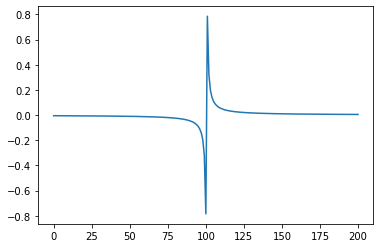

In [9]:
x = [x for x in range(-201,200,2)]

# plt.plot(x)

y = [math.atan(1/_) for _ in x]

plt.plot(y)

## Python String format() Method

### Method 1: using f-string

In [21]:
num = 1000000000
 
print(f"{num:,d}\n{num:f}\n{num:,.4f}")

1,000,000,000
1000000000.000000
1,000,000,000.0000


In [19]:
num = 123456.1234567

print(f'{num:,.2f}\n{num:.2f}\n{num:,.5f}')

123,456.12
123456.12
123,456.12346


### Method 2: string.format()

In [11]:
res = '{:,}'.format(1000000)

print(res)

1,000,000


In [12]:
num = 123456.1234567
 
res = '{:,.2f}'.format(num)
print(res)

123,456.12


### Padding Substitutions or Generating Spaces

#### Example: Demonstration of spacing when strings are passed as parameters

By default, strings are left-justified within the field, and numbers are right-justified. We can modify this by placing an alignment code just following the colon.

   - `<`   :  left-align text in the field
   - `^`   :  center text in the field
   - `>`   :  right-align text in the field

In [22]:
# To demonstrate spacing when
# strings are passed as parameters
print("{0:4}, is the computer science portal for {1:8}!"
      .format("GeeksforGeeks", "geeks"))
 
# To demonstrate spacing when numeric
# constants are passed as parameters.
print("It is {0:5} degrees outside !"
      .format(40))
 
# To demonstrate both string and numeric
# constants passed as parameters
print("{0:4} was founded in {1:16}!"
      .format("GeeksforGeeks", 2009))
 
# To demonstrate aligning of spaces
print("{0:^16} was founded in {1:<4}!"
      .format("GeeksforGeeks", 2009))
 
print("{:*^20s}".format("Geeks"))

GeeksforGeeks, is the computer science portal for geeks   !
It is    40 degrees outside !
GeeksforGeeks was founded in             2009!
 GeeksforGeeks   was founded in 2009!
*******Geeks********


#### Example: To demonstrate the organization of large data using format()

In [24]:
# which prints out i, i ^ 2, i ^ 3,
#  i ^ 4 in the given range
 
# Function prints out values
# in an unorganized manner
def unorganized(a, b):
    for i in range(a, b):
        print(i, i**2, i**3, i**4)
 
# Function prints the organized set of values
def organized(a, b):
    for i in range(a, b):
 
        # Using formatters to give 6
        # spaces to each set of values
        print("{:6d} {:6d} {:6d} {:6d}"
              .format(i, i ** 2, i ** 3, i ** 4))
 
# Driver Code
n1 = 3
n2 = 10
 
print("------Before Using Formatters-------")
 
# Calling function without formatters
unorganized(n1, n2)
 
print()
print("-------After Using Formatters---------")
print()
 
# Calling function that contains
# formatters to organize the data
organized(n1, n2)

------Before Using Formatters-------
3 9 27 81
4 16 64 256
5 25 125 625
6 36 216 1296
7 49 343 2401
8 64 512 4096
9 81 729 6561

-------After Using Formatters---------

     3      9     27     81
     4     16     64    256
     5     25    125    625
     6     36    216   1296
     7     49    343   2401
     8     64    512   4096
     9     81    729   6561


In [27]:
scale = 1e6

equity = 18989629000000/scale

print("{:<12} {:>10,.0f}".format('Equity:',equity))

TL = 7382445000000.0/scale

print("{:<12} {:>10,.0f}".format("Total Liab:", TL))

TD = 4731303000000.0/scale

print("{:<12} {:>10,.0f}".format("Total Debt:", TD))

Equity:      18,989,629
Total Liab:   7,382,445
Total Debt:   4,731,303


### Format numbers in scientific notation

In [29]:
num = 123456789

# Method 1:
print("{:e}".format(num))
print("{:.2e}".format(num))

# Method 2:
print(f"{num:E}")

1.234568e+08
1.23e+08
1.234568E+08


### Format Number to Other Base

There are few format specifiers to format a number to other bases.

For example:

   - `b` for binary
   - `o` for octal
   - `x` for hexadecimal


In [30]:
num = 12345

# binary Format
print(f"{num} in binary is {num:b}")

# octal Format
print(f"{num} in octal is {num:o}")

# hexadecimal Format
print(f"{num} in hexadecimal is {num:x}")

12345 in binary is 11000000111001
12345 in octal is 30071
12345 in hexadecimal is 3039


### Separators

In [31]:
x = 1000000

print(f"{x:,}")  # 1,000,000
print(f"{x:_}")  # 1_000_000

1,000,000
1_000_000


In [32]:
x = 4863.4343091

print(f"{x:,.3f}")  # 4,863.434
print(f"{x:_.3f}")  # 4_863.434

4,863.434
4_863.434


### Using a dictionary for string formatting 

Using a dictionary to unpack values into the placeholders in the string that needs to be formatted. We basically use ** to unpack the values. This method can be useful in string substitution while preparing an SQL query.

In [25]:
introduction = 'My name is {first_name} {middle_name} {last_name} AKA the {aka}.'
full_name = {
    'first_name': 'Tony',
    'middle_name': 'Howard',
    'last_name': 'Stark',
    'aka': 'Iron Man',
}
 
# Notice the use of "**" operator to unpack the values.
print(introduction.format(**full_name))

My name is Tony Howard Stark AKA the Iron Man.


### Python format() with list

Given a list of float values, the task is to truncate all float values to 2-decimal digits. Let’s see the different methods to do the task.

In [26]:
# Python code to truncate float
# values to 2 decimal digits.
   
# List initialization
Input = [100.7689454, 17.232999, 60.98867, 300.83748789]
   
# Using format
Output = ['{:.2f}'.format(elem) for elem in Input]
   
# Print output
print(Output)

['100.77', '17.23', '60.99', '300.84']


# Class Objects

In [47]:
class Person:
    
    # CLASS ATTRIBUTES
    species = 'human'

    def __init__(self, first_name, last_name, age):
        self.first_name = first_name
        self.last_name = last_name
        self.age = age

    # YOU NEED TO INCLUDE self AS THE FIRST ARGUMENT TO ANY METHOD
    # THIS ALLOWS THE FUNCTION TO ACCESS THE self OBJECTS ATTRIBUTES
    
    def get_full_name(self):
        return f"{self.first_name} {self.last_name}"

    def introduce(self):
        return f"Hi. I'm {self.first_name} {self.last_name}. I'm {self.age} years old."

    # YOU NEED TO PLACE THE @classmethod DECORATOR ABOVE THE METHOD
    # YOU ALSO NEED TO USE cls INSTEAD OF self, AS cls IS THE CLASS ITSELF

    @classmethod
    def create_anonymous(cls):
        return cls('John', 'Doe', 25)

    


In [54]:
person_anon = Person.create_anonymous()

print(person_anon.__dict__)
print(person_anon.species)


{'first_name': 'John', 'last_name': 'Doe', 'age': 25}
human


In [55]:
person_2 = Person('mike','smith',34)

In [58]:
Person.species = 'dog'

person_2.species

'dog'

In [63]:
class Number :
      
    # Class Attributes
    one = 'first'
    two = 'second'
    three = 'third'
      
    def __init__(self, attr):
        self.attr = attr
          
    def show(self): 
        print(Number.one, self.two, self.three, self.attr)
          
n = Number(2)
n.show()

first second third 2
